Question o1

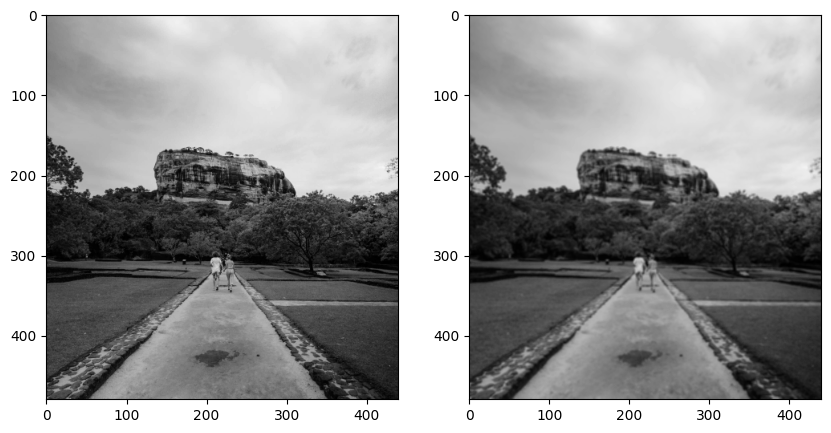

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/sigiriya.jpg' ,cv.IMREAD_REDUCED_GRAYSCALE_4 )
assert im is not None

kernel = np.ones(( 3,3 ), np.float32)/9.
result = cv.filter2D(im, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

Question 02

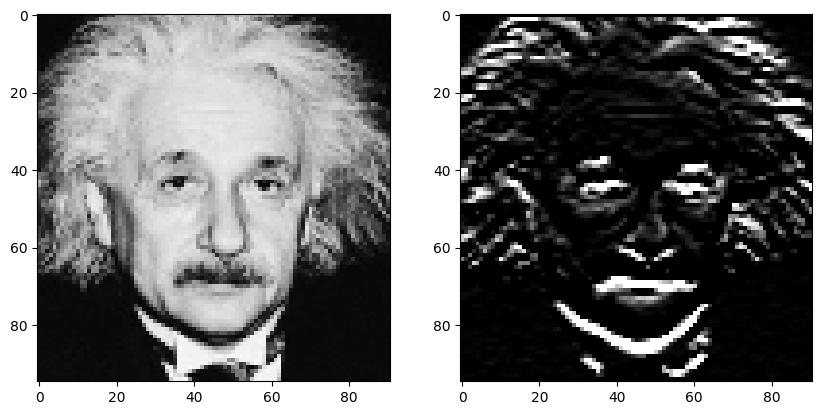

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/einstein.png' ,cv.IMREAD_REDUCED_GRAYSCALE_4 )
assert im is not None
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
result = cv.filter2D(im, -1, sobel_v)
result = cv.normalize(result, result, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)


fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

Question 06
part a,

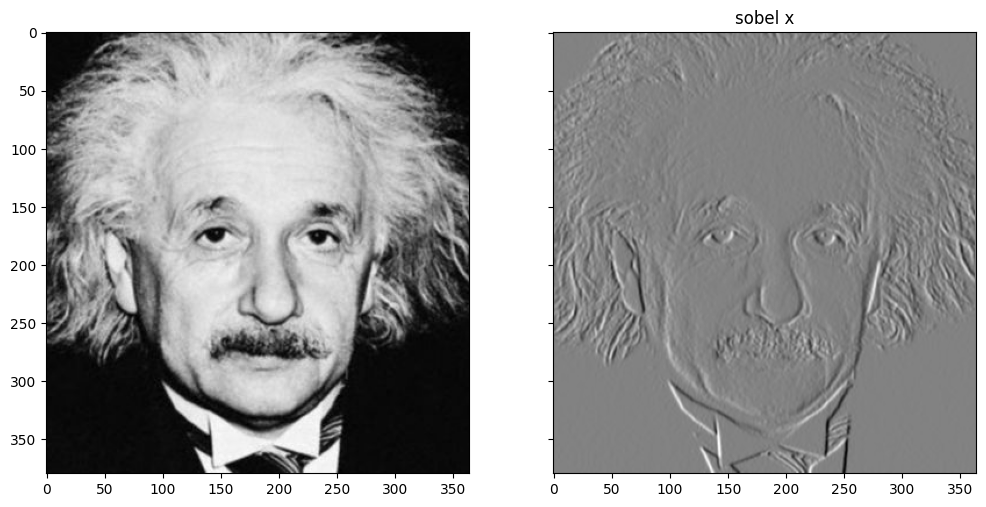

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/einstein.png' ,cv.IMREAD_GRAYSCALE)
assert im is not None

image_float = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
grad_x = cv.Sobel(image_float, -1, 1, 0, ksize =3)

fig, axes = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (12, 12))
grad_x = cv.normalize(grad_x.astype('float'),None, 0, 1.0, cv.NORM_MINMAX)

axes[0].imshow(im, cmap='gray')
axes[1].imshow(grad_x, cmap='gray')
axes[1].set_title( 'sobel x')
plt.show()

Question 06
part b,

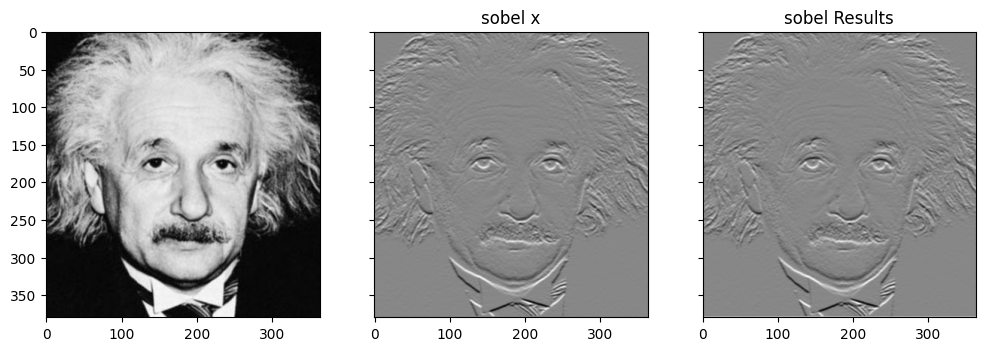

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/einstein.png' ,cv.IMREAD_GRAYSCALE)
assert im is not None

image_float = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
grad_x = cv.Sobel(image_float, -1, 0, 1, ksize =3)
grad_x = cv.normalize(grad_x.astype('float'),None, 0, 1.0, cv.NORM_MINMAX)


sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
h, w = im.shape
k_hh, k_hw = sobel_v.shape[0]//2, sobel_v.shape[1]//2
grad_x_results = np.ones(im.shape, np.float32)
for m in range (k_hh, h - k_hh):
  for n in range (k_hw, w - k_hw):
    grad_x_results[m, n] = np.dot(image_float[m - k_hh : m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), sobel_v.flatten())
      

fig, axes = plt.subplots(1, 3, sharex = 'all', sharey = 'all', figsize = (12, 12))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(grad_x, cmap='gray')
axes[1].set_title( 'sobel x')
axes[2].imshow(grad_x_results, cmap='gray')
axes[2].set_title( 'sobel Results')
plt.show()

Question 06
part c,

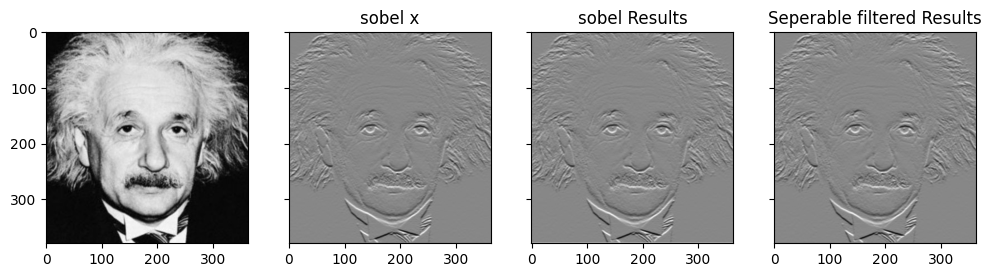

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/einstein.png' ,cv.IMREAD_GRAYSCALE)
assert im is not None

image_float = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
grad_x = cv.Sobel(image_float, -1, 0, 1, ksize =3)
grad_x = cv.normalize(grad_x.astype('float'),None, 0, 1.0, cv.NORM_MINMAX)


sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
h, w = im.shape
k_hh, k_hw = sobel_v.shape[0]//2, sobel_v.shape[1]//2
grad_x_results = np.ones(im.shape, np.float32)
for m in range (k_hh, h - k_hh):
  for n in range (k_hw, w - k_hw):
    grad_x_results[m, n] = np.dot(image_float[m - k_hh : m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), sobel_v.flatten())
      
k1 = np.array([[1], [2], [1]],np.float32)
k2 = np.array([-1, 0, 1], np.float32)
k1filtered = cv.sepFilter2D(image_float, -1, k1, k2)

fig, axes = plt.subplots(1, 4, sharex = 'all', sharey = 'all', figsize = (12, 12))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(grad_x, cmap='gray')
axes[1].set_title( 'sobel x')
axes[2].imshow(grad_x_results, cmap='gray')
axes[2].set_title( 'sobel Results')
axes[3].imshow(k1filtered, cmap='gray')
axes[3].set_title( 'Seperable filtered Results')
plt.show()